<a href="https://colab.research.google.com/github/FerrazThales/AirbnbParis/blob/main/Analisando_os_Dados_do_Airbnb_da_cidade_de_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
Notebook de Análise de Dados da Cidade de Paris, desafio do primeiro módulo do
*curso [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



# *Paris* - A cidade Olímpica de 2024

A olimpíada de 2024 promete ser a mais ecológica da história. O comitê organizador pretende reutilizar a maior parcela de espaço possível e construir apenas instalações temporárias.

Além da inclusão do *breakdance* como modalidade esportiva, a Cidade Luz também espera como novidade para estes jogos olímpicos a presença massiva dos fãs de esporte.

Alinhado a agenda de sustentabilidade do governo francês e a uma grande quantidade de público, o [Airbnb](https://www.airbnb.com.br/) desponta como uma excelente escolha para os futuros espectadores dos jogos.



**Desta forma, neste *notebook*, iremos analisar os dados extraídos no ano de 2021 referentes aos imóveis do Airbnb da cidade de Paris e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
dados_airbnb_paris = pd.read_csv('http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/visualisations/listings.csv')

## Análise dos Dados da Próxima Cidade **Olímpica**


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude do imóvel
* `longitude` - Coordenada da longitude do imóvel
* `room_type` - Tipo de quarto que é oferecido
* `price` - Preço em **euros** para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que o imóvel possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
dados_airbnb_paris.head(5)

id  ... availability_365
0  2577  ...              364
1  5396  ...               23
2  7397  ...              209
3  7964  ...              352
4  9359  ...              358

[5 rows x 16 columns]

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Este dataset é composto de:')
print('Entradas: {:,.0f}'.format(dados_airbnb_paris.shape[0]).replace(",","."))
print('Variáveis: {}\n'.format(dados_airbnb_paris.shape[1]))

# verificar os tipos de dados que têm no dataset de Paris

pd.DataFrame(dados_airbnb_paris.dtypes,columns=['Tipo de Dados'])

Este dataset é composto de:
Entradas: 51.040
Variáveis: 16



Tipo de Dados
id                                     int64
name                                  object
host_id                                int64
host_name                             object
neighbourhood_group                  float64
neighbourhood                         object
latitude                             float64
longitude                            float64
room_type                             object
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
last_review                           object
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de qualquer *banco de dados* está relacionada à quantidade de valores ausentes. Desta forma, é preciso avaliar desde o início quais valores são apresentados como nulos em nosso dataset

* Observamos que todos os valores da coluna `neighbourhood_group` são nulos. Portanto, é possível retirá-los de nosso dataset sem maiores prejuízos

* Aproximadamente 1 imóvel em cada 4 não possui valores significativos de reviews mensais. Estes imóveis provavelmente são pouco alugados pelos usuários

* Além disso, observamos que cerca de 25% dos imóveis não possuem uma data de última review

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
pd.DataFrame(((dados_airbnb_paris.isnull().sum()/dados_airbnb_paris.shape[0]).round(2)).sort_values(ascending=False),columns=['Fração'])

Fração
neighbourhood_group               1.00
reviews_per_month                 0.24
last_review                       0.24
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
minimum_nights                    0.00
price                             0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
host_name                         0.00
host_id                           0.00
name                              0.00
id                                0.00

### **Q3. Qual o tipo de distribuição das variáveis?** 

Uma maneira de avaliar a distribuição das variáveis é utilizando um histograma. O histograma é um gráfico de barras que apresenta a distribuição das frequências dos valores da variável que está sendo analisada.

* Se observarmos o histograma da variável `price`, veremos que há uma grande quantidade de imóveis com valores de aluguel na faixa de 0 a 2.000 euros

* O histograma da variável `minimum_nights` nos chama muita atenção, já que 2.000 noites mínimas é um valor exorbitante. Por conta disso, faremos uma avaliação mais apurada de outliers nesta variável. 

* Além disso, o histograma da variável `calculated_host_listings_count` também apresenta alguns valores fora do comum que precisarão ser analisados minuciosamente.

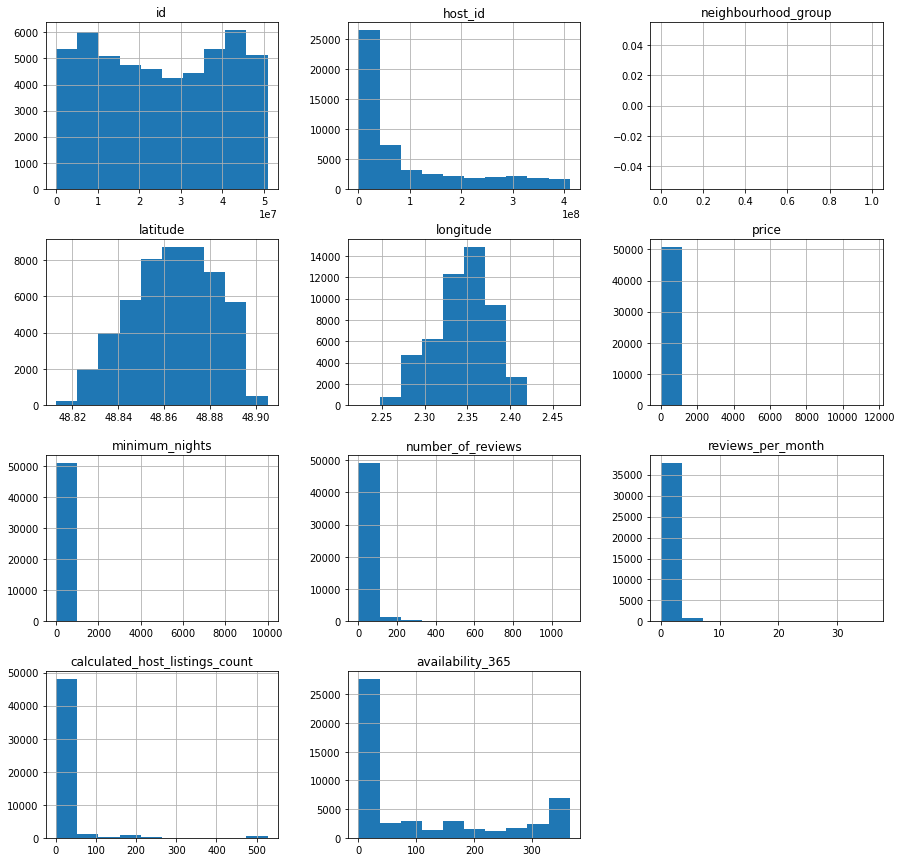

In [6]:
# plotar o histograma das variáveis numéricas
dados_airbnb_paris.hist(bins = 10, figsize=(15,15));

### **Q4. Há Outliers no dataset?**

Para verificar a presença de outliers em nosso dataset, precisamos averiguar as principais métricas estatísticas.

* Inicialmente, separamos apenas as colunas de interesse
* Acessamos o método *describe* do Pandas para uma melhor visualização destas métricas

In [7]:
#resumo estatístico das variáveis que apresentaram histogramas incomuns
dados_airbnb_paris[['price','minimum_nights','calculated_host_listings_count']].describe().round()

price  minimum_nights  calculated_host_listings_count
count  51040.0         51040.0                         51040.0
mean     125.0           111.0                            15.0
std      247.0           170.0                            62.0
min        0.0             1.0                             1.0
25%       60.0             2.0                             1.0
50%       85.0             4.0                             1.0
75%      130.0           365.0                             2.0
max    11600.0          9999.0                           527.0

Avaliando o *describe*, notamos que os valores máximos das variáveis são extremamente excessivos. Além disso, há um desvio padrão (std) considerável em todas estas variáveis.

Boxplot das variáveis

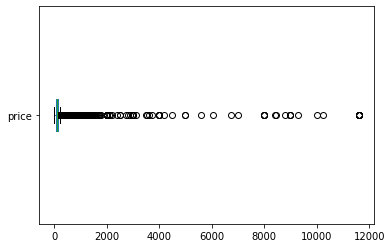

In [8]:
#boxplot dos preços
dados_airbnb_paris.price.plot(kind='box', vert=False);

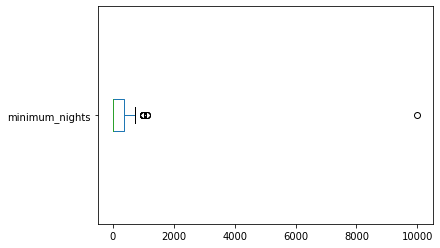

In [9]:
#boxplot dos minimum_nights
dados_airbnb_paris.minimum_nights.plot(kind='box', vert=False);

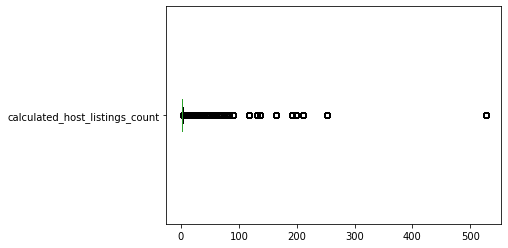

In [10]:
#boxplot dos calculated_host_listings_count
dados_airbnb_paris.calculated_host_listings_count.plot(kind='box', vert=False);

Como previamente notado, existem outliers em todas estas variáveis e estes valores podem afetar as medidas estatísticas de centralidade. 

Limpeza dos Dados

In [11]:
#Cópia dos dados
dados_airbnb_paris_clean = dados_airbnb_paris.copy()

#Pegando os valores que se demonstraram críveis em nossa base de dados
preco = 1200
noites_minimas = 365
quantidade_de_casas_anfitriao = 150

#Limpando a base de dados

#price
dados_airbnb_paris_clean.drop(dados_airbnb_paris_clean[(dados_airbnb_paris_clean.price > preco) | (dados_airbnb_paris_clean.price ==0) ].index,
                              axis=0,inplace=True)

#minimum_nights
dados_airbnb_paris_clean.drop(dados_airbnb_paris_clean[dados_airbnb_paris_clean.minimum_nights > noites_minimas].index,
                              axis=0,inplace=True)

#calculated_host_listings_count
dados_airbnb_paris_clean.drop(dados_airbnb_paris_clean[dados_airbnb_paris_clean.calculated_host_listings_count>quantidade_de_casas_anfitriao].index,
                              axis=0,inplace=True)

dados_airbnb_paris_clean.drop('neighbourhood_group',axis=1 , inplace= True)


### **Q5. Qual a média dos preços de aluguel?**

In [12]:
# ver a média da coluna de preços
print('A média dos preços de aluguel de imóveis é de € {:.2f}'.format(dados_airbnb_paris_clean.price.mean()))

A média dos preços de aluguel de imóveis é de € 114.32


### **Q6. Qual a correlação existente entre as variáveis**

In [13]:
# criar uma matriz de correlação
matriz_de_correlacao = dados_airbnb_paris_clean.corr()
# mostrar a matriz de correlação
matriz_de_correlacao

id  ...  availability_365
id                              1.000000  ...          0.128814
host_id                         0.549947  ...          0.161552
latitude                        0.003647  ...         -0.038115
longitude                      -0.050310  ...         -0.096188
price                           0.071705  ...          0.270629
minimum_nights                 -0.192603  ...         -0.286267
number_of_reviews              -0.299935  ...          0.190441
reviews_per_month               0.108072  ...          0.248457
calculated_host_listings_count  0.177055  ...          0.264306
availability_365                0.128814  ...          1.000000

[10 rows x 10 columns]

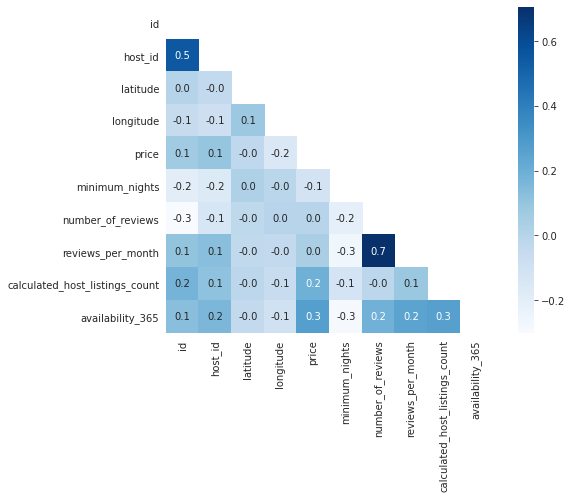

In [14]:
# plotar um heatmap a partir das correlações
mask = np.zeros_like(matriz_de_correlacao)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
  f, ax = plt.subplots(figsize = (9,6))
  ax =  sns.heatmap(matriz_de_correlacao, mask=mask, square=True,cmap="Blues", annot= True, fmt='.1f');

* Há uma pequena correlação entre a disponibilidade do imóvel e seu preço. De certa forma, podemos dizer que o imóvel está muito tempo disponível devido a seu provável alto preço.
* Também há uma pequena correlação interessante entre a quantidade de noite mínimas e os reviews. Quanto maior a quantidade mínima de noites exigidas, menos reviews são dados.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
dados_airbnb_paris_clean.room_type.value_counts()
print('O tipo de imóvel mais alugado no Airbnb é: {}'.format(dados_airbnb_paris_clean.room_type.value_counts().index[0]))

O tipo de imóvel mais alugado no Airbnb é: Entire home/apt


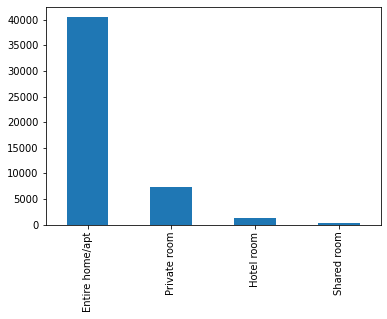

In [16]:
#comparação visual dos dados
dados_airbnb_paris_clean.room_type.value_counts().plot(kind = 'bar'); 

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(dados_airbnb_paris_clean.room_type.value_counts()/dados_airbnb_paris_clean.room_type.shape[0]).round(3)

Entire home/apt    0.820
Private room       0.148
Hotel room         0.024
Shared room        0.007
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [18]:
# ver preços por bairros, na média
print('5 bairros mais caros: \n')
pd.DataFrame(dados_airbnb_paris_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False))[:5].round(2)


5 bairros mais caros: 



price
neighbourhood         
Élysée          212.58
Louvre          175.92
Palais-Bourbon  169.58
Luxembourg      161.56
Hôtel-de-Ville  154.11

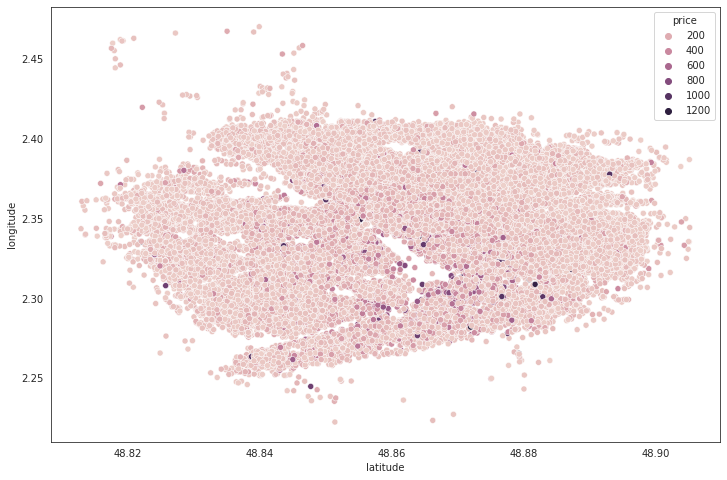

In [19]:
# plotar os imóveis pela latitude-longitude
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize = (12,8))
  ax =  sns.scatterplot(x=dados_airbnb_paris_clean['latitude'], y= dados_airbnb_paris_clean['longitude'], hue= dados_airbnb_paris_clean['price']);


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``
print('A média do mínimo de noites é de {:.2f}'.format(dados_airbnb_paris_clean.minimum_nights.mean()))

A média do mínimo de noites é de 113.94


In [21]:
#dados estatísticos do minimum_nights
dados_airbnb_paris_clean.minimum_nights.describe()

count    49310.000000
mean       113.938572
std        164.857366
min          1.000000
25%          2.000000
50%          4.000000
75%        365.000000
max        365.000000
Name: minimum_nights, dtype: float64

Verificou-se que uma grande parcela dos dados ( > 30%) são maiores que 300 dias. Isto evidencia que na França o Airbnb é utilizado, também, como uma forma de locação de imóvel para o médio prazo.

### **Q10. Qual é disposição geográfica dos dados, considerando o preço?**

In [22]:
import folium
from folium.plugins import FastMarkerCluster
import plotly.express as px

#### Visualizando os dados através de Cluster. Desta forma, podemos ver na visão macro a quantidade de imóveis que estão disponíveis para locação nesta área.

In [28]:
my_map = folium.Map(location=[48.86,2.34],zoom_start=12,width='50%',height='50%',disable_3d=True,detect_retina=True)
my_map.add_child(FastMarkerCluster(dados_airbnb_paris_clean[['latitude','longitude']].values.tolist()))
my_map

#### Visualizando os dados de acordo com o preço. Quanto maior for o tamanho do círculo e mais se aproximar do vermelho, maior é o valor de aluguel do imóvel.

In [29]:
fig = px.scatter_mapbox(data_frame=dados_airbnb_paris_clean,
                        lat='latitude',
                        lon = 'longitude',
                        color = 'price',
                        hover_name = 'neighbourhood',
                        height=500,
                        width=800,
                        size = 'price',zoom=16,text='room_type',color_continuous_scale=px.colors.sequential.OrRd);

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
fig.show()



## Conclusões


* Temos um dataset extremamente robusto, já que apresenta mais de 50 mil entradas
* Em **Paris** os anfitriões do Airbnb optam por fornecer imóveis *maiores* e *completos*. Além disso, há uma grande oferta de propriedades nas regiões centrais
* Os `hosts`optam por fazer uma grande quantidade de anúncios no site e disponibilizar uma quantidade mínima de noites semelhantes a contratos de aluguel
* O preço médio de aluguel é de € 114.32, sendo os bairros Élysée e Louvre os mais caros
* Podemos organizar nossa locação com antecedência avaliando os calendários dos jogos e os mapas interativos